# IS709 Assignment 4

### Due: January 10, Sunday-23.59

### Submission and Grading Policy

- Submit your assignments to the corresponding assignment link in https://odtuclass.metu.edu.tr.
- Solutions should be submitted in a single **ipynb** file named: metu-username_HW_4.ipynb (e.g., “e123456_HW_4.ipynb”).
- Late submissions will be accepted by January 13, 2021, 23:59 with a 5% per day penalty.
<!-- - Do not change variable names in the code blocks and the texts in the markdowns. -->
- **This is an individual assignment. You have to adhere to the academic integrity principles.**
- You are supposed to be able to interpret your findings. Hence, you shouldn't just find a number or result and just leave it. You need to comment on your findings by giving as much as **necessary** details.    

## Questions

### Clustering Part

There are two datasets for the clustering part. They are data_cls_1.csv and data_cls_2.csv.     
You need to answer the below questions for each dataset. (You are going to use true labels files in Q2)



**Q1.**     
**a.** Generate  k-means models for k= 2, 3, 4, 5, 6, 7, 8, 9, and 10.    
Determine the optimal value of k by looking at **wss graph** and **silhouette scores**.      
    
**b.** Plot the clusters for the optimal value of k.    
<font color=#C91414> Hint: Please use principal component analysis for 2D plotting since the number of attributes is greater than 2.</font>      
     
     
  
**Q2.**    
**a.** Generate  DBSCAN models for epsilon values between 0.1 (included) and 2.5(included) incrementing it with steps=0.10 and for min_samples=5, 10, 15 and 20.   
Find the optimal value of k by **adjusted rand scores**. (While calculating adjusted rand scores you will need true labels. Please see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score)    
     
**b.** Plot the clusters for the optimal value of k.  
<font color=#C91414> Hint: Please use principal component analysis for 2D plotting since the number of attributes is greater than 2.</font>    
  
**Q3.** Did you obtain the same optimal k values in Q1 and Q2? Comment on the quality of the clusters that you obtained in Q1 and Q2. Which algorithm gave a better result? What could be the reason one of them outperforms in different cases?





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score


In [2]:
data_cls_1=pd.read_csv("data_cls_1.csv")
data_cls_1.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,40.226304,37.081376,35.209127,75.330242,17.672391,27.497090,57.013295,5.113742,63.930379,9.346422,-6.191034
1,85.996811,74.455732,62.925498,39.126579,-12.636727,68.339717,28.756462,-16.898102,29.864839,3.507974,102.766347
2,30.591942,38.354330,36.019911,69.085608,28.646499,37.343518,70.340656,-1.778445,45.242897,16.405643,23.521429
3,87.770142,75.804025,35.252146,6.568852,22.081418,39.029706,44.954073,44.892467,19.336486,50.259634,15.249212
4,16.121389,31.997123,40.157397,68.144570,21.050408,38.224853,46.247525,7.683514,65.415319,15.164662,9.884010


For performing clustering task, if there are any missing value in the data set, they must be removed or estimated. If you look at the below output, you can see that there is no missing value in the data set.

In [3]:
for columns in data_cls_1:
    print(columns,"--> # of missing value", data_cls_1[columns].isna().sum() )

x1 --> # of missing value 0
x2 --> # of missing value 0
x3 --> # of missing value 0
x4 --> # of missing value 0
x5 --> # of missing value 0
x6 --> # of missing value 0
x7 --> # of missing value 0
x8 --> # of missing value 0
x9 --> # of missing value 0
x10 --> # of missing value 0
x11 --> # of missing value 0


In [4]:
# Kmeans use distance-based measurements to determine the similarity between data points.
# Therefore, it’s recommended to standardize the data to have a mean of 0 and a standard deviation of 1.

standardscaler= StandardScaler()
scaled_data_1=standardscaler.fit_transform(data_cls_1)
scaled_data_1=pd.DataFrame(scaled_data_1, columns=data_cls_1.columns)
scaled_data_1.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,-0.595470,-1.343787,-0.597243,1.389894,0.317690,-0.461951,0.951956,-0.906677,1.201774,-0.880882,-0.922459
1,0.914513,0.179274,0.563102,-0.121377,-2.278410,1.456387,-0.359526,-1.624609,-0.979690,-1.087471,2.250523
2,-0.913310,-1.291912,-0.563299,1.129220,1.257668,0.000526,1.570518,-1.131471,0.005079,-0.631096,-0.057193
3,0.973015,0.234219,-0.595442,-1.480454,0.695342,0.079725,0.392252,0.390736,-1.653897,0.566803,-0.298091
4,-1.390698,-1.550978,-0.390084,1.089938,0.607031,0.041922,0.452285,-0.822862,1.296866,-0.675007,-0.454332


Since the dataset has 11 features, the visualization in 2D is impossible. Therefore observations are represented by points in the plot by using principal components (if ncol(data) > 2)

In [5]:
pca_columns_1=[]
for i in range(scaled_data_1.shape[1]):
    pca_columns_1.append("pc"+str(i+1))

pca = PCA()
pca_data_1 = pca.fit_transform(scaled_data_1)
pca_data_1 = pd.DataFrame(pca_data_1, columns=pca_columns_1)
print("pca.explained variance ratio:\n", pca.explained_variance_ratio_)

pca.explained variance ratio:
 [0.32468437 0.25937646 0.2001569  0.07805631 0.03746549 0.02354879
 0.02016181 0.01797674 0.01468643 0.01282296 0.01106372]


<span style="background-color:#A2CBE4">Within Sum of Squares(WSS) - Elbow Method For Optimal k </span>  

The total within-cluster sum of squares (wss) measures the compactness of the clustering and we want it to be as small as possible. Optimal number of clusters can been determined by looking at where the elbow/bend in the knee occurs. According to this, by looking at within-cluster sum of square (wss), it can bee said that the optimal number of clusters is 4. Although the first bend in the knee occurs at k=2, there is a considerable decrease to the k=4. After k=4 there isn't a considerable decrease and the slope becomes horizontal.

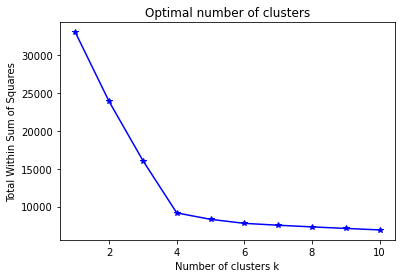

In [6]:
wss = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=23)
    kmeans = kmeans.fit(scaled_data_1)
    wss.append(kmeans.inertia_)
plt.plot(K, wss, 'b*-')
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("Optimal number of clusters")
plt.show()

## inertia_: Sum of squared distances of samples to their closest cluster center.

<span style="background-color:#A2CBE4"> Average Silhouette Approach </span>      
The average silhouette approach measures the quality of a clustering. It determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering. The average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximizes the average silhouette over a range of possible values for k. According to this, by looking at silhouete graph, it can be said that optimal number of class is 4.

n_clusters = 2 The average silhouette_score is : 0.3030
n_clusters = 3 The average silhouette_score is : 0.4125
n_clusters = 4 The average silhouette_score is : 0.5191
n_clusters = 5 The average silhouette_score is : 0.4800
n_clusters = 6 The average silhouette_score is : 0.4094
n_clusters = 7 The average silhouette_score is : 0.3946
n_clusters = 8 The average silhouette_score is : 0.3922
n_clusters = 9 The average silhouette_score is : 0.2706
n_clusters = 10 The average silhouette_score is : 0.2607


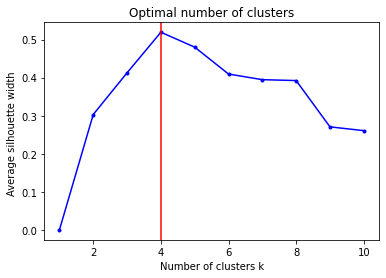

In [7]:
sil_avg = [0]
K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=23)
    cluster_labels=kmeans.fit_predict(scaled_data_1) ###same with>> cluster_labels=kmeans.labels_
    silhouette_avg = silhouette_score(scaled_data_1, cluster_labels)
    sil_avg.append(silhouette_avg)
    print("n_clusters =", k, "The average silhouette_score is : %.4f" % silhouette_avg)
    
plt.plot(range(1,len(sil_avg)+1), sil_avg, 'b.-')
plt.xlabel("Number of clusters k")
plt.ylabel("Average silhouette width ")
plt.title("Optimal number of clusters")
plt.axvline( color='r', x=sil_avg.index(max(sil_avg))+1 )
# plt.axis([0, 11, -0.01, 0.25])
plt.show()    


Since our dataset 11 features the visualization in 2D is impossible. Therefore observations are represented by points in the plot, using principal components if ncol(data) > 2

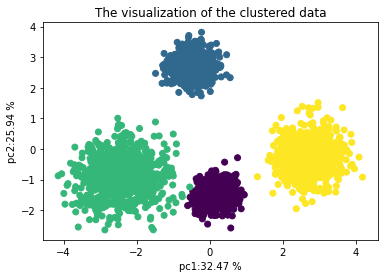

In [8]:
kmeans = KMeans(n_clusters=4, random_state=23)
df1=pca_data_1[["pc1","pc2"]].copy()
df1["clusters"]=kmeans.fit_predict(scaled_data_1)
plt.scatter(df1["pc1"], df1["pc2"],c=df1.clusters)
plt.title("The visualization of the clustered data")
plt.xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
plt.ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
plt.show()

# rows=5
# columns=2
# f, axes = plt.subplots(rows,columns, figsize=(16, 30))
# count=2
# for i in range(rows):
#     for j in range(columns):
#         kmeans = KMeans(n_clusters=count, random_state=23)
#         df=pca_data[["pc1","pc2"]].copy()
#         df["clusters"]=kmeans.fit_predict(scaled_data_1)
#         axes[i,j].scatter(df['pc1'], df['pc2'],c=df.clusters)      
#         axes[i,j].set_title( "k= " +str(count) )
#         axes[i,j].set_xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
#         axes[i,j].set_ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
#         count=count+1    

In [9]:
data_cls_2=pd.read_csv("data_cls_2.csv")
data_cls_2.head()

,x1,x2
0,3.023752,1.983671
1,3.121064,1.991024
2,3.005478,2.086026
3,2.954867,1.983077
4,3.008450,2.001135


In [10]:
for columns in data_cls_2:
    print(columns,"--> # of missing value", data_cls_2[columns].isna().sum() )

scaled_data_2=standardscaler.fit_transform(data_cls_2)
scaled_data_2=pd.DataFrame(scaled_data_2, columns=data_cls_2.columns)
scaled_data_2.head()
    

x1 --> # of missing value 0
x2 --> # of missing value 0


,x1,x2
0,-0.093835,-0.975885
1,-0.002140,-0.968491
2,-0.111054,-0.872960
3,-0.158745,-0.976482
4,-0.108254,-0.958324


In [11]:
pca_columns_2=[]
for i in range(scaled_data_2.shape[1]):
    pca_columns_2.append("pc"+str(i+1))

pca2 = PCA()
pca_data_2 = pca.fit_transform(scaled_data_2)
pca_data_2 = pd.DataFrame(pca_data_2, columns=pca_columns_2)
print("pca.explained variance ratio:\n", pca.explained_variance_ratio_)

pca.explained variance ratio:
 [0.74007745 0.25992255]


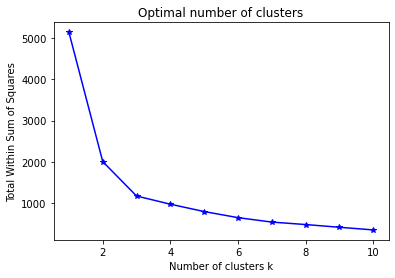

In [12]:
wss = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=23)
    kmeans = kmeans.fit(scaled_data_2)
    wss.append(kmeans.inertia_)
plt.plot(K, wss, 'b*-')
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("Optimal number of clusters")
plt.show()

n_clusters = 2 The average silhouette_score is : 0.5413
n_clusters = 3 The average silhouette_score is : 0.5154
n_clusters = 4 The average silhouette_score is : 0.4481
n_clusters = 5 The average silhouette_score is : 0.3683
n_clusters = 6 The average silhouette_score is : 0.3989
n_clusters = 7 The average silhouette_score is : 0.3949
n_clusters = 8 The average silhouette_score is : 0.4081
n_clusters = 9 The average silhouette_score is : 0.4488
n_clusters = 10 The average silhouette_score is : 0.4700


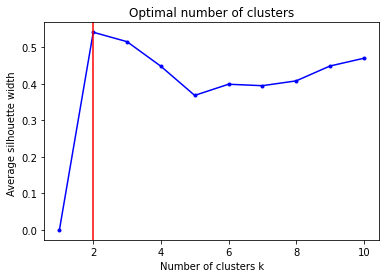

In [13]:
sil_avg = [0]
K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=23)
    cluster_labels=kmeans.fit_predict(scaled_data_2) ###same with>> cluster_labels=kmeans.labels_
    silhouette_avg = silhouette_score(scaled_data_2, cluster_labels)
    sil_avg.append(silhouette_avg)
    print("n_clusters =", k, "The average silhouette_score is : %.4f" % silhouette_avg)
    
plt.plot(range(1,len(sil_avg)+1), sil_avg, 'b.-')
plt.xlabel("Number of clusters k")
plt.ylabel("Average silhouette width ")
plt.title("Optimal number of clusters")
plt.axvline( color='r', x=sil_avg.index(max(sil_avg))+1 )
# plt.axis([0, 11, -0.01, 0.25])
plt.show() 

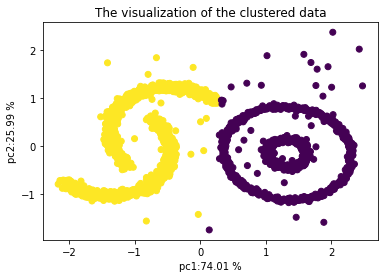

In [14]:
kmeans = KMeans(n_clusters=2, random_state=23)
df2=pca_data_2[["pc1","pc2"]].copy()
df2["clusters"]=kmeans.fit_predict(scaled_data_2)
plt.scatter(df2["pc1"], df2["pc2"],c=df2.clusters)

plt.title("The visualization of the clustered data")
plt.xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
plt.ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
plt.show()

## try also this 
# since number of features are equal to 2, you don't have to use pca

# plt.scatter(scaled_data_2["x2"], scaled_data_2["x1"],c=df2.clusters) 
# plt.xlabel("x1")
# plt.ylabel("x2")
# plt.show()


In [15]:
# rows=5
# columns=2
# f, axes = plt.subplots(rows,columns, figsize=(16, 30))
# count=2
# for i in range(rows):
#     for j in range(columns):
#         kmeans = KMeans(n_clusters=count, random_state=23)
#         df2=pca_data_2[["pc1","pc2"]].copy()
#         df2["clusters"]=kmeans.fit_predict(scaled_data_2)
#         axes[i,j].scatter(df2['pc1'], df2['pc2'],c=df2.clusters)      
#         axes[i,j].set_title( "k= " +str(count) )
#         axes[i,j].set_xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
#         axes[i,j].set_ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
#         count=count+1   

## Q2.

In [16]:
y_true=pd.read_csv("true_label_cls1.csv")

records=pd.DataFrame(columns=["eps","min_samples","rand_score", "n_clusters", "n_noise"])
count=0

epsilon=np.arange(0.1,2.5, 0.1)
min_samples=[5,10,15,20]

for eps in epsilon:
    for number_of_min_samples in min_samples: 

        db = DBSCAN(eps=eps, min_samples=number_of_min_samples).fit(scaled_data_1)
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        
       
        rand_score = adjusted_rand_score(y_true.iloc[:,0], labels)

        records.loc[count]=[eps, number_of_min_samples, rand_score, n_clusters_, n_noise_]
        count=count+1

In [17]:
sorted_records_rand=records.sort_values(by=["rand_score"], ascending=False)
sorted_records_rand.head()

,eps,min_samples,rand_score,n_clusters,n_noise
76,2.0,5.0,0.989532,4.0,24.0
77,2.0,10.0,0.987004,4.0,30.0
78,2.0,15.0,0.984513,4.0,36.0
79,2.0,20.0,0.982466,4.0,41.0
72,1.9,5.0,0.980707,4.0,45.0


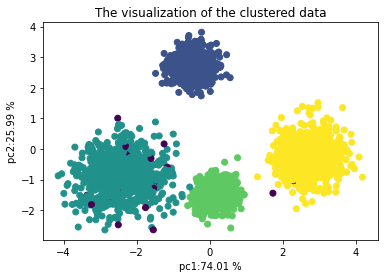

In [18]:
db = DBSCAN(eps=2, min_samples=5).fit(scaled_data_1)
labels = db.labels_

df1=pca_data_1[["pc1","pc2"]].copy()
df1["labels"]=db.labels_

plt.scatter(df1["pc1"], df1["pc2"],c=df1.labels)
plt.title("The visualization of the clustered data")
plt.xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
plt.ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
plt.show()

------------

In [19]:
y_true=pd.read_csv("true_label_cls2.csv")

records=pd.DataFrame(columns=["eps","min_samples","rand_score", "n_clusters", "n_noise"])
count=0

epsilon=np.arange(0.1, 2.6, 0.1)
min_samples=[5,10,15,20]

for eps in epsilon:
    for number_of_min_samples in min_samples: 

        db = DBSCAN(eps=eps, min_samples=number_of_min_samples).fit(scaled_data_2)
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        
#         sil_score=silhouette_score(scaled_data_2, labels)
 
        rand_score = adjusted_rand_score(y_true.iloc[:,0], labels)
        records.loc[count]=[eps, number_of_min_samples, rand_score, n_clusters_, n_noise_]
        count=count+1

In [20]:
sorted_records_rand=records.sort_values(by=["rand_score"], ascending=False)
sorted_records_rand.head()

,eps,min_samples,rand_score,n_clusters,n_noise
0,0.1,5.0,0.984166,4.0,39.0
1,0.1,10.0,0.984166,4.0,39.0
4,0.2,5.0,0.982066,4.0,35.0
5,0.2,10.0,0.982066,4.0,35.0
6,0.2,15.0,0.982066,4.0,35.0


In [21]:
sorted_records_rand.shape

(100, 5)

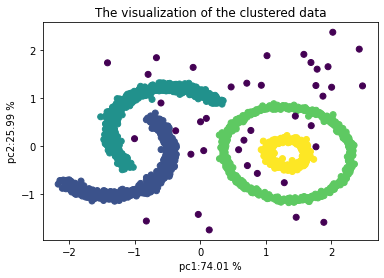

In [22]:
db = DBSCAN(eps=0.1, min_samples=5).fit(scaled_data_2)
labels = db.labels_

df2=pca_data_2[["pc1","pc2"]].copy()
df2["labels"]=db.labels_

plt.scatter(df2["pc1"], df2["pc2"],c=df2.labels)
plt.title("The visualization of the clustered data")
plt.xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
plt.ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
plt.show()

# Q3.
For data_cls_1 >> optimal k value is obtained from Q1/kmeans =4   
For data_cls_1 >> optimal k value is obtained from Q2/DBSCAN =4   
Kmeans  and DBSCAN seem to show approximately same performance at first glance. Both were able to identify the four clusters. However, in DBSCAN some points in clusters are marked as noises.    
    
       

For data_cls_2 >> optimal k value is obtained from Q1/kmeans =2   
For data_cls_2 >> optimal k value is obtained from Q2/DBSCAN =4   
Kmeans fail to identif clusters for data_cls_2.


## Kmeans (distances between points)
- Flat geometry, even cluster size, not too many clusters, isotropic

- Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.(k-means assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes)
 
- Sensitive to outliers and noisy data.

- K-means tends to produce more or less round clusters

## DBSCAN (distances between nearest points)

- Non-flat geometry, uneven cluster sizes

- More robust to noise (Density-Based Spatial Clustering of Applications with Noise) DBSCAN labels noise as "-1"
